# Plots by the state with relative/absolute numbers of Microsoft AI buildings

In [1]:
import os
import json
import pandas as pd
import re
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


## Data preparation

### Definitions

In [2]:
# dictionary definitions

data_dic = {0: "blds_continent_data_18-23_ai.json",
            1: "blds_africa_states_18-23_ai.json",
            2: "blds_northamerica_states_18-23_ai.json",
            3: "blds_europe_states_18-23_ai.json",
            4: "blds_asia_states_18-23_ai.json",}
geojson_folder_dic = {0: "geojson-continent-states",
                      1: "geojson-africa-states",
                      2: "geojson-northamerica-states",
                      3: "geojson-europe-states",
                      4: "geojson-asia-states",}

In [3]:
# user input definition

while True:
    try:
        user_d_spec = int(input("Which data do you want to plot?\
                            Enter 0 for stats by continents (2018–2023),\
                            1 for stats by Africa states (2018–2023),\
                            2 for stats by North-Central America states (2018–2023),\
                            3 for stats by Europe states (2018–2023),\
                            4 for stats by Asia states (2018–2023):"
                                ))
    except ValueError:
        print("Please enter a number.")
        continue
    if user_d_spec not in range(len(data_dic)):
        print("Please enter 0, 1, 2, 3 or 4.")
        continue
    break


Please enter a number.


In [4]:
# function definitions

def data_spec(data_dic):

    try:
        with open(f"downloaded-data\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(home_dir, geojson_folder_dic[user_d_spec], "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [5]:
os.chdir('..')

data = data_spec(data_dic)

home_dir = os.getcwd()


[Errno 2] No such file or directory: 'downloaded-data\\blds_europe_states_18-23_ai.json'
Please download the data first.


### Edit the obtained data into desired shape to create a DataFrame

In [6]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [7]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [8]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

In [9]:
# set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [10]:
# reset display options
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")


In [11]:
df.dtypes

feature       object
source        object
timestamp     object
value        float64
year           int64
dtype: object

In [12]:
# handle wrong feature name of Egypt

if user_d_spec == 1:
    df.loc[df["feature"] == "feature1", "feature"] = 46


In [13]:
# df

### Append the names of the regions to the DataFrame

In [14]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic)


['0_Ethiopia.geojson', '10_Democratic Republic of the Congo.geojson', '11_Namibia.geojson', '12_South Africa.geojson', '13_Libya.geojson', '14_Tunisia.geojson', '15_Zambia.geojson', '16_Sierra Leone.geojson', '17_Guinea.geojson', '18_Liberia.geojson', '19_Central African Republic.geojson', '1_South Sudan.geojson', '20_Sudan.geojson', '21_Djibouti.geojson', '22_Eritrea.geojson', '23_Ivory Coast.geojson', '24_Mali.geojson', '25_Senegal.geojson', '26_Nigeria.geojson', '27_Benin.geojson', '28_Angola.geojson', '29_Botswana.geojson', '2_Somalia.geojson', '30_Zimbabwe.geojson', '31_Chad.geojson', '32_Algeria.geojson', '33_Mozambique.geojson', '34_Eswatini.geojson', '35_Burundi.geojson', '36_Rwanda.geojson', '37_Uganda.geojson', '38_Lesotho.geojson', '39_Cameroon.geojson', '3_Kenya.geojson', '40_Gabon.geojson', '41_Niger.geojson', '42_Burkina Faso.geojson', '43_Togo.geojson', '44_Ghana.geojson', '45_Guinea-Bissau.geojson', '46_Egypt.geojson', '47_Mauritania.geojson', '48_Equatorial Guinea.geoj

In [15]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1] # using lib RegularExpression to separate the ID number and the state name
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [16]:
# merge df with region names based on IDs
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
# df.head(20)

In [17]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


### Filtering the data

In [18]:
# get the number of AI Microsoft (source=microsoft/BuildingFootprints) / manually mapped (remainder) buildings for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped

In [19]:
grouped


name      year
Algeria   2018     261826.0
          2019     365631.0
          2020     404078.0
          2021     428225.0
          2022     538250.0
                    ...    
Zimbabwe  2019    3481873.0
          2020    3668184.0
          2021    3696191.0
          2022    3809584.0
          2023    3869906.0
Name: value, Length: 330, dtype: float64

In [20]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", "year"], how="left", )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
# merged_data.head(10)


In [21]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


name      year
Algeria   2018    100.0
          2019    100.0
          2020    100.0
          2021    100.0
          2022    100.0
                  ...  
Zimbabwe  2019    100.0
          2020    100.0
          2021    100.0
          2022    100.0
          2023    100.0
Name: percentage, Length: 330, dtype: float64

In [22]:
df_ai_rel = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=microsoft/BuildingFootprints") & (merged_data["percentage"] > 0.3), :]
df_ai_rel.head()


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
11,0,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,6327.0,2023,0,Ethiopia,759918.0,0.832590
23,10,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,23080.0,2023,10,Democratic Republic of the Congo,6556598.0,0.352012
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,8219.0,2023,12,South Africa,1613686.0,0.509331
59,13,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,15840.0,2023,13,Libya,771530.0,2.053063
83,15,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,159932.0,2023,15,Zambia,5156140.0,3.101778


In [23]:
len(df_ai_rel)


13

In [24]:
df_ai_rel


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
11,0,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,6327.0,2023,0,Ethiopia,759918.0,0.832590
23,10,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,23080.0,2023,10,Democratic Republic of the Congo,6556598.0,0.352012
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,8219.0,2023,12,South Africa,1613686.0,0.509331
59,13,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,15840.0,2023,13,Libya,771530.0,2.053063
83,15,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,159932.0,2023,15,Zambia,5156140.0,3.101778
155,20,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,100035.0,2023,20,Sudan,643941.0,15.534808
227,26,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,1055014.0,2023,26,Nigeria,10542964.0,10.006806
371,37,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,69237.0,2023,37,Uganda,7763552.0,0.891821
407,3,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,853292.0,2023,3,Kenya,4827742.0,17.674764
491,46,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,12065.0,2023,46,Egypt,161475.0,7.471745


### Plots

#### Relative numbers

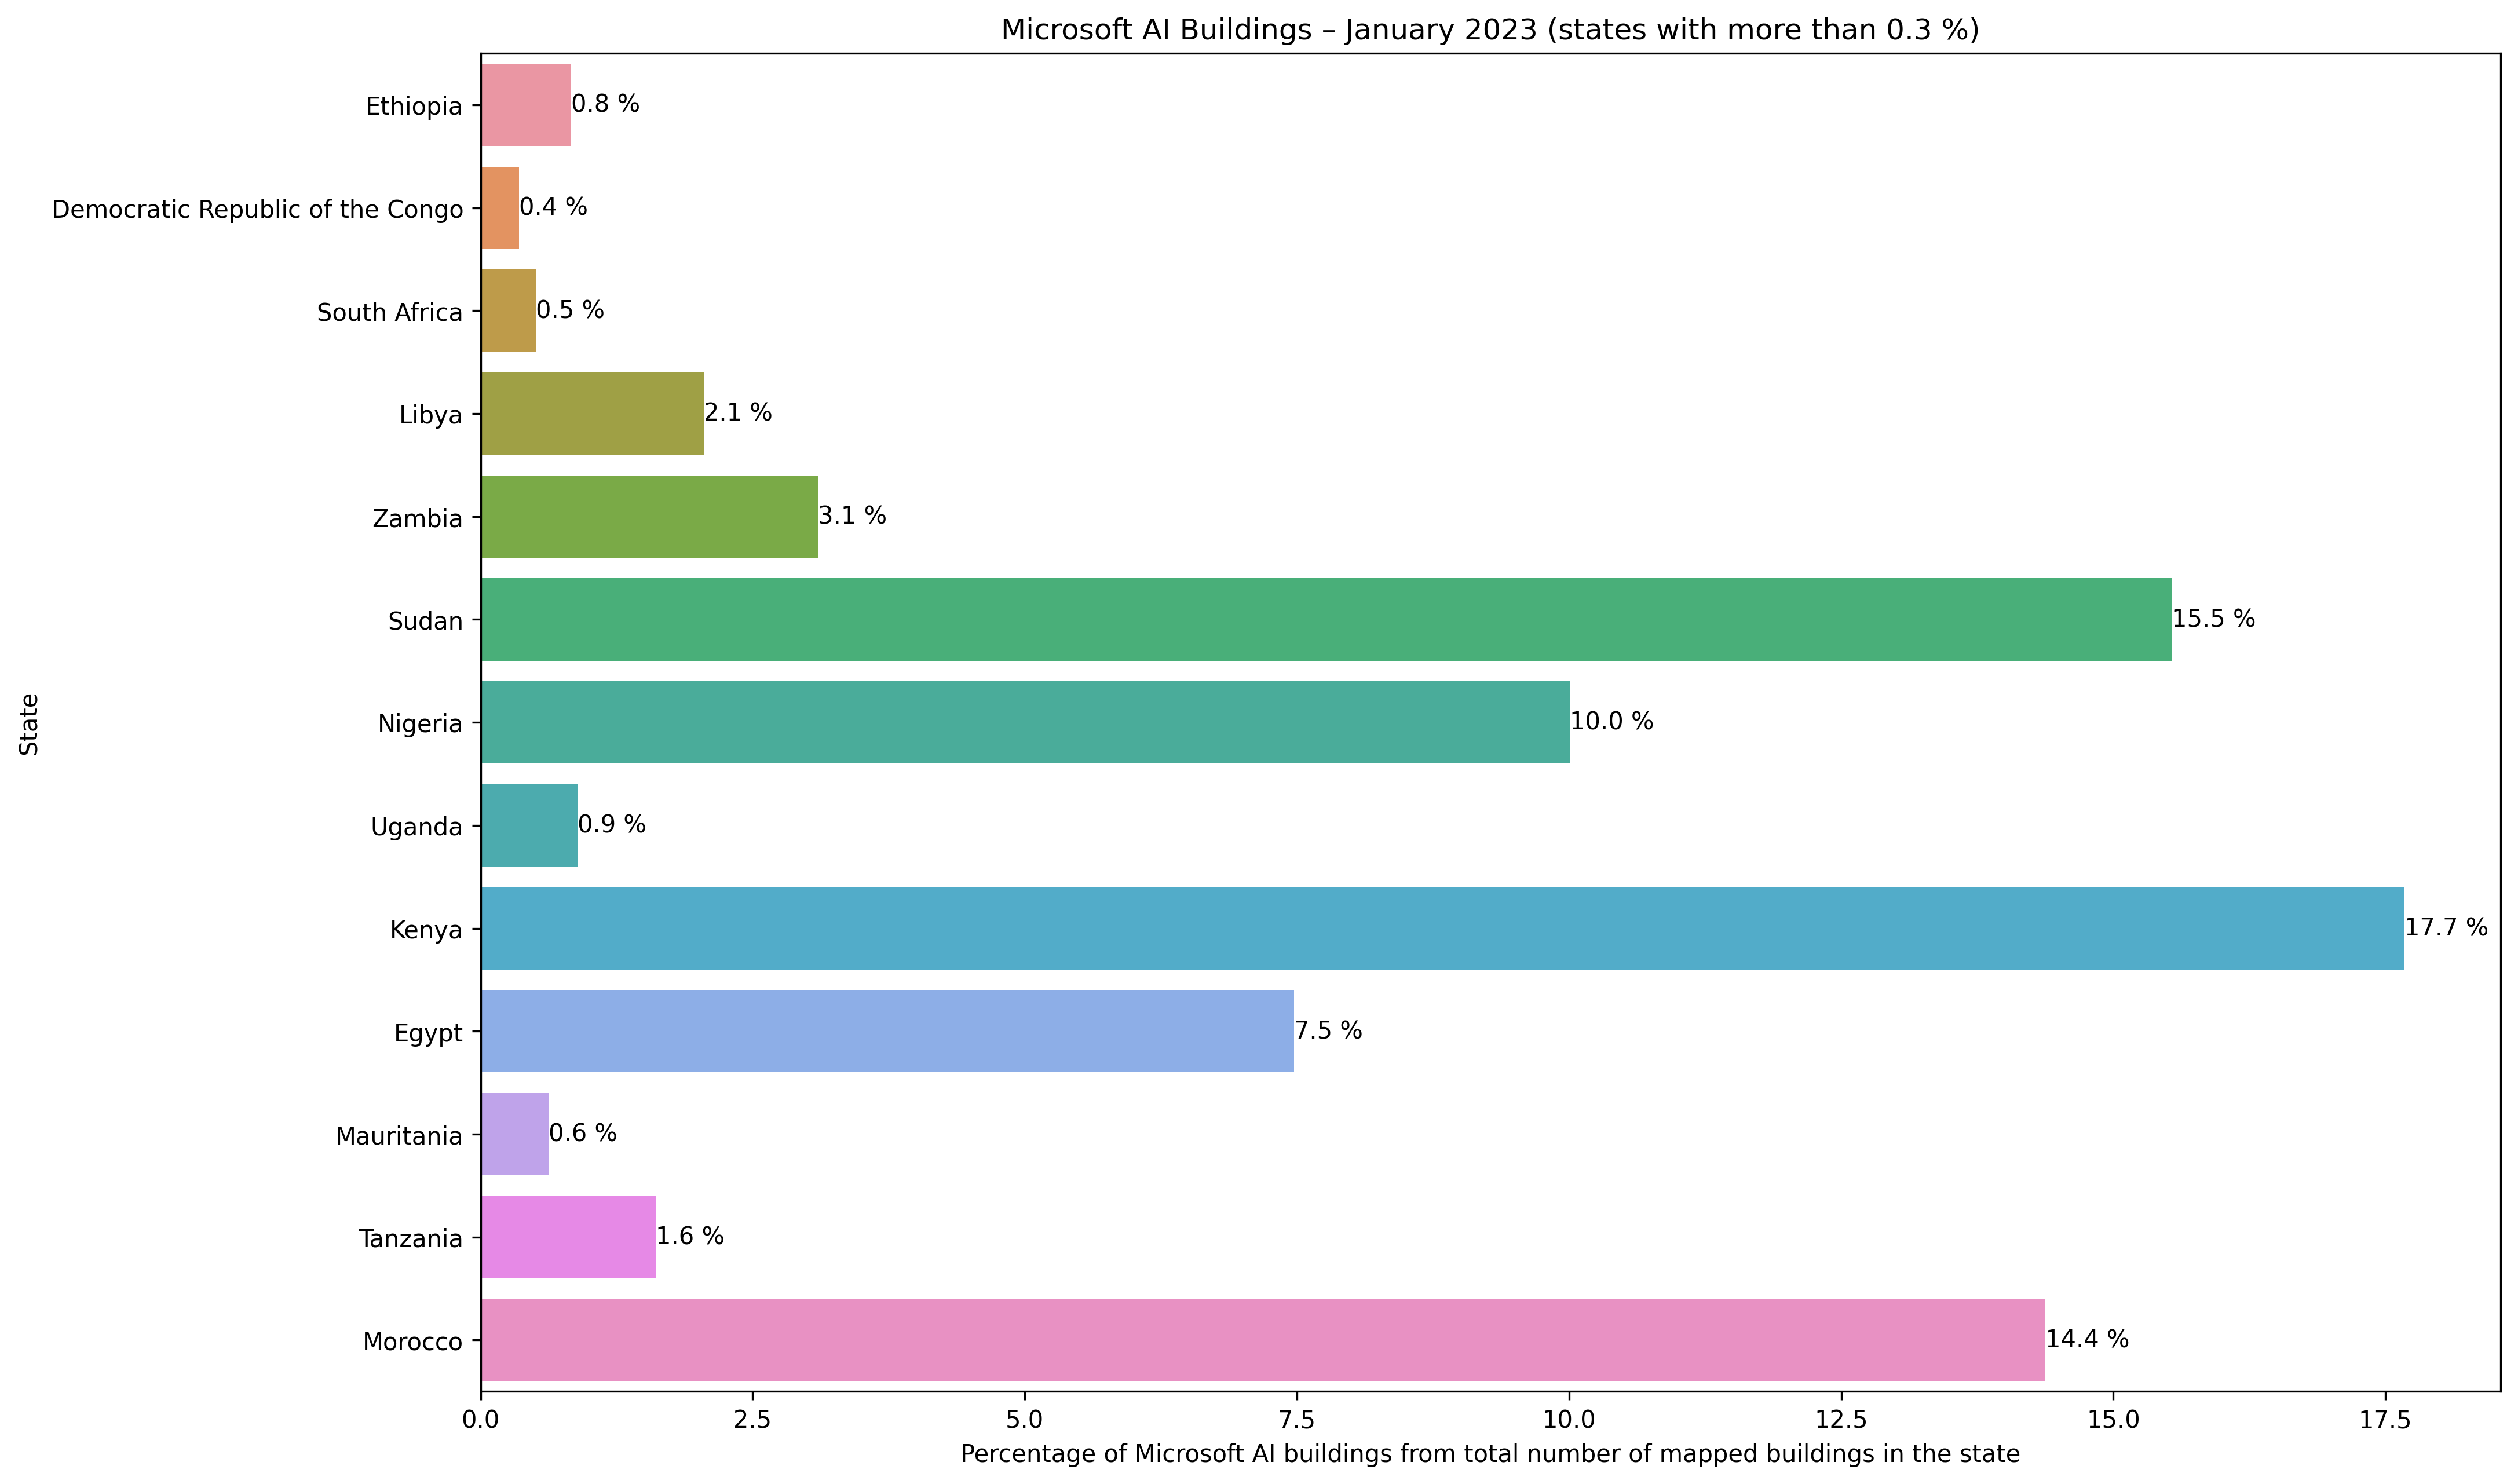

In [25]:
fig, ax = plt.subplots(figsize=(15, 10), dpi=300)

# create horizontal barplot
sns.barplot(x=df_ai_rel["percentage"], y=df_ai_rel["name"], orient='h', ax=ax)


# add percentage labels
for i, percent in enumerate(df_ai_rel["percentage"]):
    if np.isfinite(percent):
        ax.text(percent, i, str(round(percent, 1)) +
                ' %', ha='left', va='center')
        
# Set axis labels and title
ax.set_xlabel('Percentage of Microsoft AI buildings from total number of mapped buildings in the state')
ax.set_ylabel('State')
ax.set_title('Microsoft AI Buildings – January 2023 (states with more than 0.3 %)')

plt.show()



#### Absolute numbers

In [26]:
df_ai_abs = merged_data.loc[(merged_data["year"] == 2023) & (merged_data["source"] == "source=microsoft/BuildingFootprints") & (merged_data["num_of_blds"] > 100), :]
df_ai_abs.head()


,feature,source,timestamp,num_of_blds,year,id,name,total_blds,percentage
11,0,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,6327.0,2023,0,Ethiopia,759918.0,0.832590
23,10,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,23080.0,2023,10,Democratic Republic of the Congo,6556598.0,0.352012
47,12,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,8219.0,2023,12,South Africa,1613686.0,0.509331
59,13,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,15840.0,2023,13,Libya,771530.0,2.053063
71,14,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,551.0,2023,14,Tunisia,496703.0,0.110931


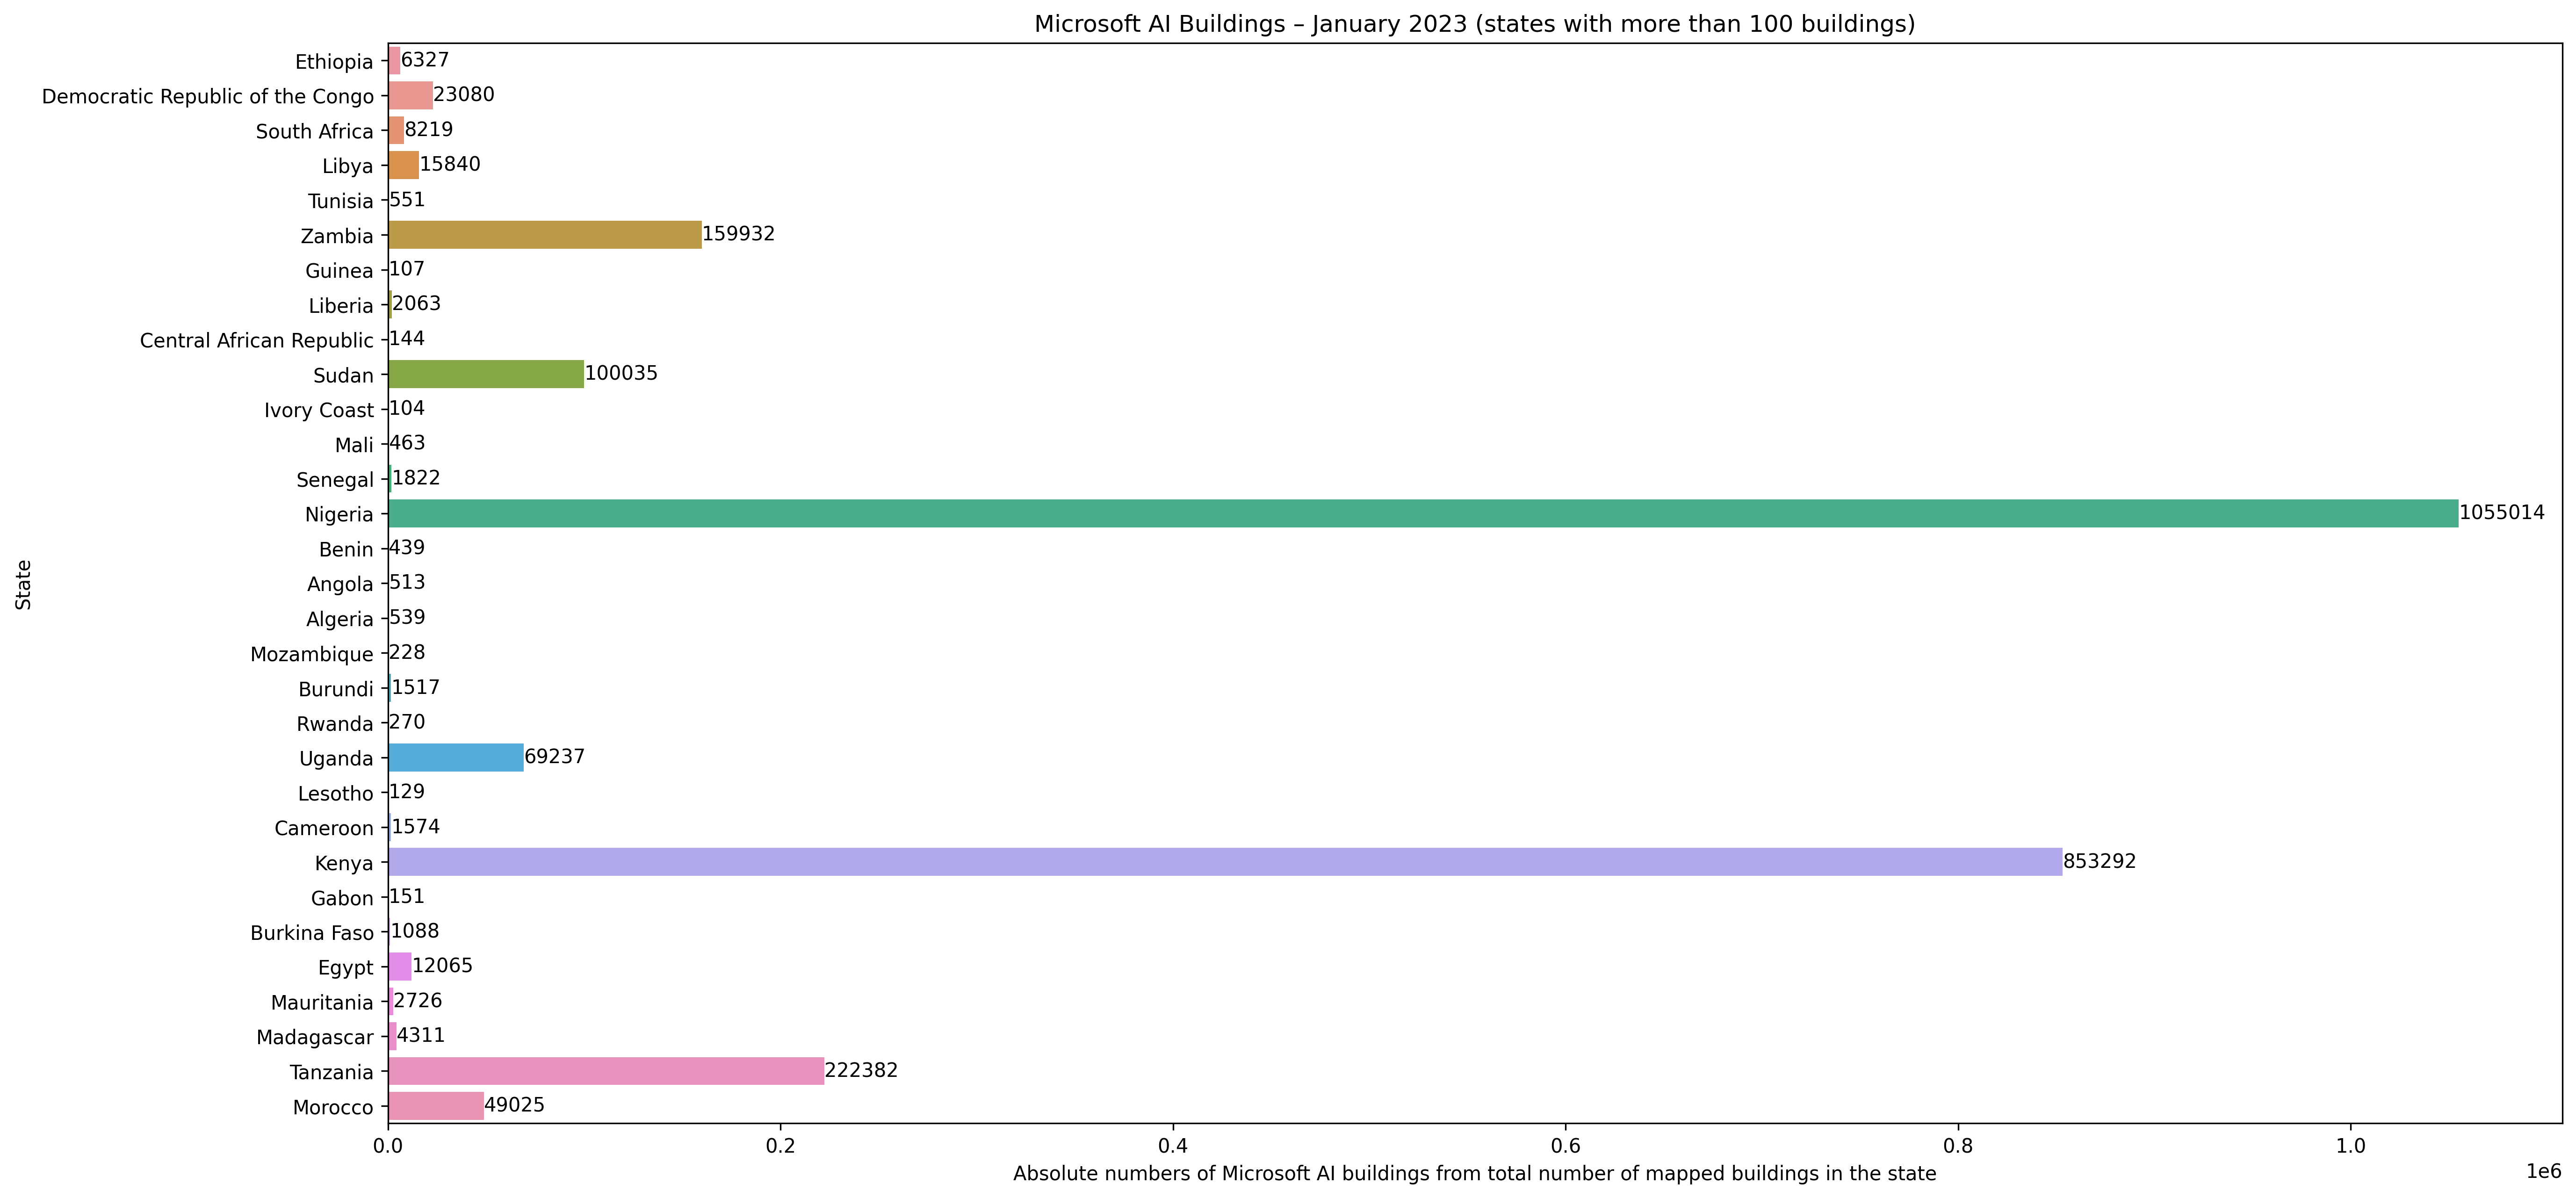

In [27]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)

# create horizontal barplot
sns.barplot(x=df_ai_abs["num_of_blds"], y=df_ai_abs["name"], orient='h', ax=ax)


# add percentage labels
for i, num in enumerate(df_ai_abs["num_of_blds"]):
    if np.isfinite(num):
        ax.text(num, i, str(int(num)), ha='left', va='center')

# Set axis labels and title
ax.set_xlabel('Absolute numbers of Microsoft AI buildings from total number of mapped buildings in the state')
ax.set_ylabel('State')
ax.set_title('Microsoft AI Buildings – January 2023 (states with more than 100 buildings)')

plt.show()


#### Plotly lib

In [28]:
# Create the horizontal percentage bar chart
fig = px.bar(df_ai_rel, x='percentage', y='name', orientation='h')

# Set the x-axis limit to 100
fig.update_xaxes(range=[0, 100])

# Customize the chart
fig.update_traces(marker_color='skyblue', marker_line_color='black',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title='Percentage of Microsoft AI buildings from total number of mapped buildings in the state',
                  xaxis_title='Percentage of Microsoft AI buildings from total number of mapped buildings in the state',
                  yaxis_title='State',
                  height=1000)

# Display the chart
fig.show()
